In [1]:
pip install --upgrade matplotlib seaborn plotly ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install tensorflow keras pandas numpy jupyter tqdm opencv-contrib-python scikit-learn
!pip install keras-preprocessing
!pip install ipywidgets
!pip install tqdm

In [3]:
# Import necessary libraries
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [4]:
# Define paths (update these paths as per your directory structure)
TRAIN_DIR = r"C:\Users\priya\Downloads\archive (1)\images\images\train"
TEST_DIR = r"C:\Users\priya\Downloads\archive (1)\images\images\validation"

In [5]:
# Function to create a DataFrame from image directories
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        label_path = os.path.join(dir, label)
        if os.path.isdir(label_path):  # Ensure it's a directory
            for imagename in os.listdir(label_path):
                image_paths.append(os.path.join(label_path, imagename))
                labels.append(label)
            print(label, "completed")
    return image_paths, labels

In [6]:
# Create train and test DataFrames
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
# Function to extract features from images
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')  # Load in grayscale
        img = img.resize((48, 48))  # Resize to 48x48
        img = np.array(img)
        features.append(img)
    
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)  # Reshape for CNN
    features = features / 255.0  # Normalize to [0, 1]
    return features

In [8]:
# Extract features for train and test data
train_features = extract_features(train['image'])
test_features = extract_features(test['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

  0%|          | 0/7066 [00:00<?, ?it/s]

In [9]:
# Encode labels
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [10]:
# Define the CNN model
model = Sequential([
    Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(512, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(512, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')  # Output layer for 7 classes
])

C:\Users\priya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Define the CNN model
model = Sequential([
    Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(512, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(512, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')  # Output layer for 7 classes
])

C:\Users\priya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
# Train the model
history = model.fit(
    x=train_features, y=y_train,
    batch_size=128, epochs=3,  # Reduced epochs for faster testing
    validation_data=(test_features, y_test)
)

Epoch 1/3
226/226 ━━━━━━━━━━━━━━━━━━━━ 96s 412ms/step - accuracy: 0.2306 - loss: 1.8367 - val_accuracy: 0.2608 - val_loss: 1.7952
Epoch 2/3
226/226 ━━━━━━━━━━━━━━━━━━━━ 106s 471ms/step - accuracy: 0.2533 - loss: 1.7954 - val_accuracy: 0.3326 - val_loss: 1.6732
Epoch 3/3
226/226 ━━━━━━━━━━━━━━━━━━━━ 95s 419ms/step - accuracy: 0.3292 - loss: 1.6710 - val_accuracy: 0.4281 - val_loss: 1.5144


In [15]:
# Save the model
model_json = model.to_json()
with open("emotiondetector.json", "w") as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [16]:
# Load the model (for future use)
from keras.models import model_from_json
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")


In [17]:
# Function to preprocess a single image for prediction
def preprocess_image(image_path):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"The file {image_path} does not exist.")
    img = load_img(image_path, color_mode='grayscale')
    img = img.resize((48, 48))
    img = np.array(img)
    img = img.reshape(1, 48, 48, 1)
    return img / 255.0

In [18]:
# Test the model on sample images
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def predict_emotion(image_path):
    img = preprocess_image(image_path)
    pred = model.predict(img)
    pred_label = label[pred.argmax()]
    return pred_label

In [19]:
test_images = [
    r"C:\Users\priya\Downloads\archive (1)\images\train\sad\42.jpg",
    r"C:\Users\priya\Downloads\archive (1)\images\train\fear\2.jpg",
    r"C:\Users\priya\Downloads\archive (1)\images\train\disgust\299.jpg",
    r"C:\Users\priya\Downloads\archive (1)\images\train\happy\7.jpg",
    r"C:\Users\priya\Downloads\archive (1)\images\train\surprise\15.jpg"
]

Original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Model prediction is: neutral


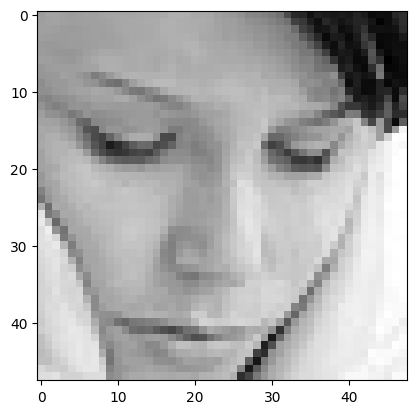

Original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Model prediction is: neutral


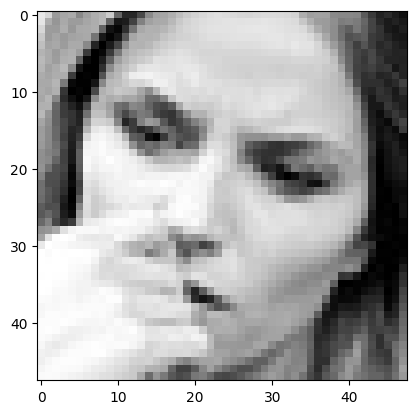

Original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Model prediction is: fear


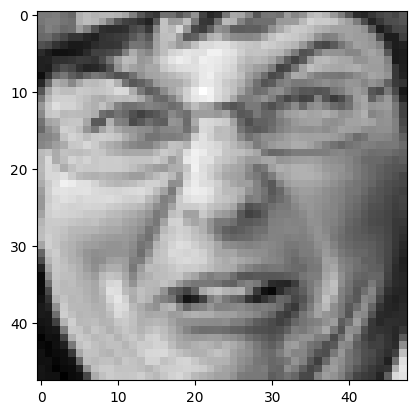

Original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Model prediction is: sad


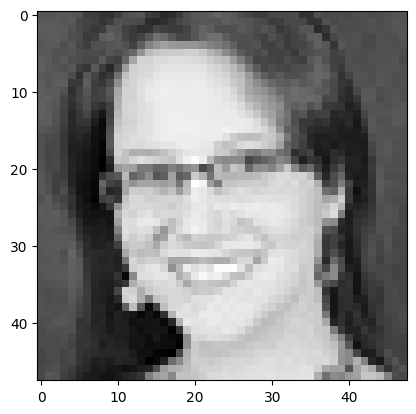

Original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Model prediction is: neutral


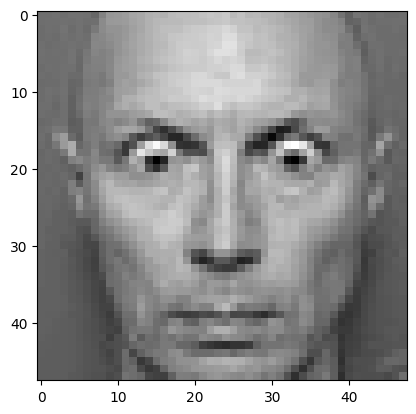

In [20]:
for image_path in test_images:
    try:
        print(f"Original image is of {image_path.split('\\')[-2]}")
        pred_label = predict_emotion(image_path)
        print("Model prediction is:", pred_label)
        img = preprocess_image(image_path)
        plt.imshow(img.reshape(48, 48), cmap='gray')
        plt.show()
    except FileNotFoundError as e:
        print(e)

In [ ]:
import cv2
from keras.models import model_from_json
import numpy as np
# from keras_preprocessing.image import load_img
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)



model.load_weights("emotiondetector.h5")
haar_file=cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade=cv2.CascadeClassifier(haar_file)

def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

webcam=cv2.VideoCapture(0)
labels = {0 : 'angry', 1 : 'disgust', 2 : 'fear', 3 : 'happy', 4 : 'neutral', 5 : 'sad', 6 : 'surprise'}
while True:
    i,im=webcam.read()
    gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(im,1.3,5)
    try: 
        for (p,q,r,s) in faces:
            image = gray[q:q+s,p:p+r]
            cv2.rectangle(im,(p,q),(p+r,q+s),(255,0,0),2)
            image = cv2.resize(image,(48,48))
            img = extract_features(image)
            pred = model.predict(img)
            prediction_label = labels[pred.argmax()]
            # print("Predicted Output:", prediction_label)
            # cv2.putText(im,prediction_label)
            cv2.putText(im, '% s' %(prediction_label), (p-10, q-10),cv2.FONT_HERSHEY_COMPLEX_SMALL,2, (0,0,255))
        cv2.imshow("Output",im)
        cv2.waitKey(27)
    except cv2.error:
        pass